To demonstrate clustring, I am using an adapted version of the glass dataset from the University of California – Irvine.
This data contains 218 observations and 9 features corresponding to the percent weight of various oxides found in glass:

* RI: refractive index
* Na: weight percent in sodium
* Mg: weight percent in magnesium
* Al: weight percent in aluminum
* Si: weight percent in silicon
* K: weight percent in potassium
* Ca: weight percent in calcium
* Ba: weight percent in barium
* Fe: weight percent in iron

In this case study, I will use the refractive index (RI) and weight percent in each oxide to segment the glass type.

### Step to do:

        1. Importing Packages Required:

In [1]:
#
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np



    2. Read the Data in the Memory.

In [2]:
df= pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


    3. Print the Size of the Dataset and Printing the First Few Rows of the Dataset

In [3]:
df.size

1962

In [4]:
df.shape

(218, 9)

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


    4. Look for some basic data frame information  

In [7]:
from skimpy import skim

In [8]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 218    │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 9      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean   ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ RI              │    0 │      0 │    1.5 │   0.003 │    1.5 │     1.5 │    1.5 │    1.5 │    1.5 │    ▇▂   │  │
│ │ Na              │    0 │      0 │     14 │    0.87 │     11 │      13 │     13 │     14 │     16 │  ▁▇▆▅▁  │  │
│ │ Mg              │    0 │      0 │    2.3 │     1.6 │      0 │       0 │    3.4 │    3.6 │    4.5 │ ▅ ▁▁▇▁  │  │
│ │ Al              │    0 │      0 │    1.6 │    0.54 │   0.29 │     1.2 │    1.4 │    1.9 │    2.9 │ ▁▂▇▃▂▁  │  │
│ │ Si              │    0 │      0 │     73 │    0.76 │     70 │      72 │     73 │     73 │     75 │    ▃▇▁  │  │
│ │ K               │    0 │      0 │   0.43 │    0.44 │      0 │   0.053 │   0.54 │   0.61 │    2.7 │  ▇▇ ▁   │  │
│ │ Ca              │    0 │      0 │    8.8 │     1.3 │    5.4 │     8.3 │    8.6 │      9 │     16 │    ▇▂   │  │
│ │ Ba              │    0 │      0 │   0.36 │    0.65 │      0 │       0 │      0 │   0.61 │    3.1 │  ▇▂▁▁   │  │
│ │ Fe              │    0 │      0 │   0.05 │   0.087 │      0 │       0 │      0 │   0.09 │   0.35 │  ▇▁▁ ▁  │  │
│ └─────────────────┴──────┴────────┴────────┴─────────┴────────┴─────────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [42]:
df.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

    5. Removing any possible order effects in the data by shuffle the rows prior to building any models and saving it as a new data frame object.  


In [9]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)


In [10]:
shuffled_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0
1,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.0
2,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0
3,1.51847,13.10,3.97,1.19,72.44,0.60,8.43,0.00,0.0
4,1.51514,14.85,0.00,2.42,73.72,0.00,8.39,0.56,0.0


In [12]:
shuffled_df.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [13]:
skim(shuffled_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 218    │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 9      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean   ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ RI              │    0 │      0 │    1.5 │   0.003 │    1.5 │     1.5 │    1.5 │    1.5 │    1.5 │    ▇▂   │  │
│ │ Na              │    0 │      0 │     14 │    0.87 │     11 │      13 │     13 │     14 │     16 │  ▁▇▆▅▁  │  │
│ │ Mg              │    0 │      0 │    2.3 │     1.6 │      0 │       0 │    3.4 │    3.6 │    4.5 │ ▅ ▁▁▇▁  │  │
│ │ Al              │    0 │      0 │    1.6 │    0.54 │   0.29 │     1.2 │    1.4 │    1.9 │    2.9 │ ▁▂▇▃▂▁  │  │
│ │ Si              │    0 │      0 │     73 │    0.76 │     70 │      72 │     73 │     73 │     75 │    ▃▇▁  │  │
│ │ K               │    0 │      0 │   0.43 │    0.44 │      0 │   0.053 │   0.54 │   0.61 │    2.7 │  ▇▇ ▁   │  │
│ │ Ca              │    0 │      0 │    8.8 │     1.3 │    5.4 │     8.3 │    8.6 │      9 │     16 │    ▇▂   │  │
│ │ Ba              │    0 │      0 │   0.36 │    0.65 │      0 │       0 │      0 │   0.61 │    3.1 │  ▇▂▁▁   │  │
│ │ Fe              │    0 │      0 │   0.05 │   0.087 │      0 │       0 │      0 │   0.09 │   0.35 │  ▇▁▁ ▁  │  │
│ └─────────────────┴──────┴────────┴────────┴─────────┴────────┴─────────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

    6. Transforming each observation into a z-score  

In [14]:
mean_shu_df = shuffled_df.mean()
std_shu_df = shuffled_df.std()


z_scores = (shuffled_df - mean_shu_df) / std_shu_df

print("DataFrame with z-scores:")
print(z_scores)

DataFrame with z-scores:
           RI        Na        Mg        Al        Si         K        Ca  \
0    0.066961  0.905718 -1.418010  0.462891  0.150453  2.247855 -1.781205   
1    1.679291 -0.182110  0.614234 -0.631138 -0.480545  0.387147  0.023645   
2   -0.552653  1.535514 -1.418010  0.555605  0.479098 -0.991155 -0.098718   
3    0.120262 -0.571438  0.997561 -0.705309 -0.401670  0.387147 -0.282262   
4   -0.989048  1.432456 -1.418010  1.575463  1.280991 -0.991155 -0.312853   
..        ...       ...       ...       ...       ...       ...       ...   
213 -0.625941  0.688153 -1.418010  2.261549  0.939200 -0.899268  0.184246   
214  1.339503  0.699603  0.906293 -2.040395 -1.282438 -0.738466  0.589572   
215 -0.009658 -0.193561  0.328259 -0.705309  0.124161  0.272288  0.176598   
216 -0.685903 -0.800455  0.675079 -0.223195  0.413369  0.019600 -0.404625   
217  0.326800  0.333177  0.729841 -0.464252 -1.229855  0.180402 -0.014594   

           Ba        Fe  
0    3.887458 -0.573224 

    7. Performing hierarchical clustering using the linkage function on scaled_features with complete method.  

In [15]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

linkage_matrix = linkage(scaled_features, method='complete')



Now that the HCA model has been built, we will continue with the analysis by visualizing clusters using a dendrogram and using the visualization to generate predictions.

    8. Displaying the dendrogram by plotting the HCA model: 
    - the leaf_rotation is 90 and , leaf_font_size is 6

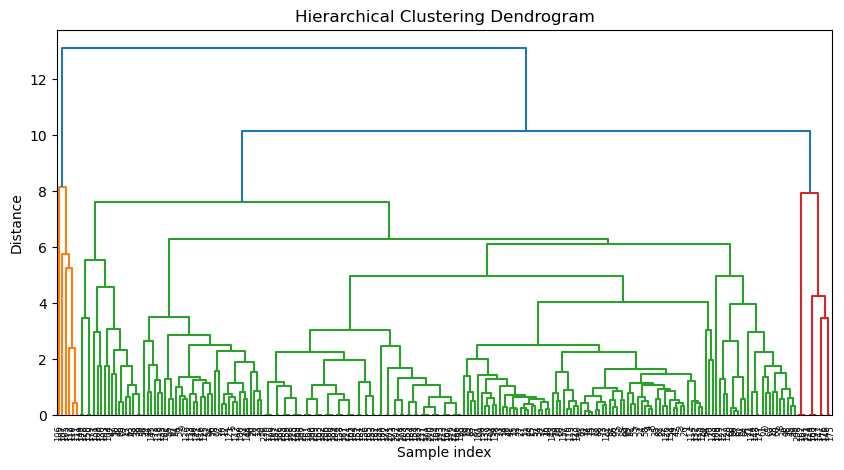

In [16]:
# plot dendrogram:

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=6)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()





    9. Interpreting the HCA dendrogram,  

utilizing HCA clusters our data into three groups

HCA has drawbacks include:

1. Vagueness in terms of the termination criteria (that is, when to finalize the number of clusters)
2. The algorithm cannot adjust once the clustering decisions have been made
3. Can be very computationally expensive to build HCA models on large datasets with many features

To address some of the HCA shortcomings,  use k-means, which has the ability to adjust when the clusters have been initially generated. It is more computationally frugal than HCA.

    10. Computing Silhouette score to measure how close observations within a cluster and plot the results.  

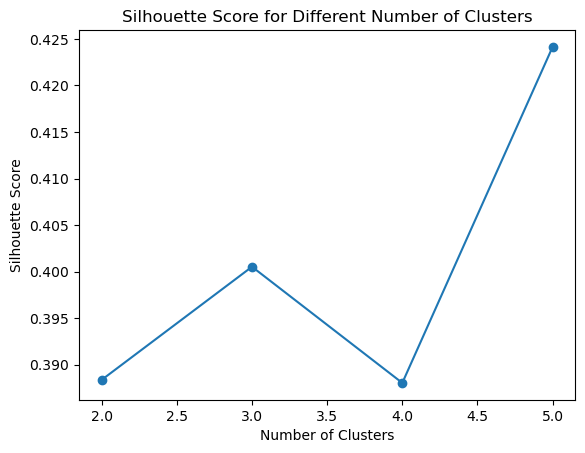

In [17]:
range_n_clusters = range(2, 6)

silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(scaled_features)
    
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters')
plt.show()

Applying k-Means Clustering for Optimal Number of Clusters  

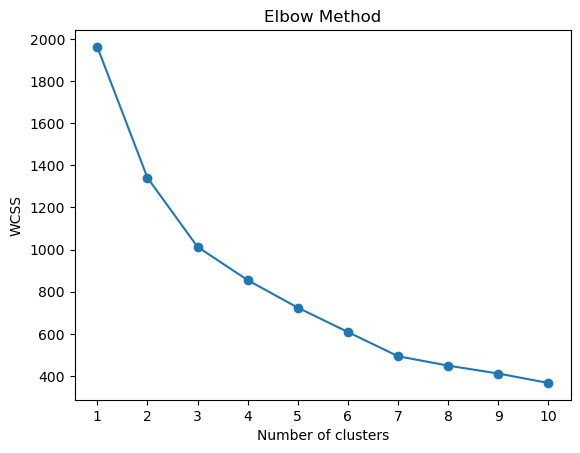

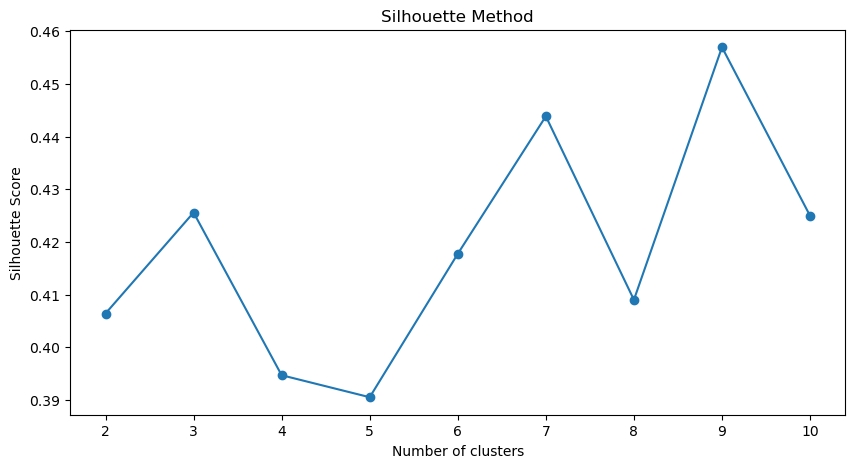

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(1, 11), wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.show()

# Silhouette Method
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores,marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 11, 1))
plt.show()

printing the number of glasses that fall within each of clusters. 

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Count the number of glasses in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts()

# Print the number of glasses in each cluster
clusters, counts = np.unique(cluster_labels, return_counts=True)
for cluster, count in zip(clusters, counts):
    print(f"Cluster {cluster}: {count} glasses")

Cluster 0: 121 glasses
Cluster 1: 59 glasses
Cluster 2: 38 glasses


    13. Using PCA to Transform Group-Related Features into Components  

In [20]:
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components with any additional relevant columns from your original dataframe
final_df = pd.concat([principal_df, df], axis=1)

# Print the final dataframe
print(final_df)

          PC1       PC2       RI     Na    Mg    Al     Si     K    Ca    Ba  \
0    1.467952  0.803882  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00   
1    0.276716 -0.788626  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00   
2    0.014838 -1.160084  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00   
3    0.826406 -0.825015  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00   
4    0.628707 -1.112541  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00   
..        ...       ...      ...    ...   ...   ...    ...   ...   ...   ...   
213 -2.725334  0.906377  1.51645  14.94  0.00  1.87  73.11  0.00  8.67  1.38   
214 -2.903940 -0.596255  1.51831  14.39  0.00  1.82  72.86  1.41  6.47  2.88   
215 -2.490536  0.992274  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54   
216 -2.785727  0.993905  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06   
217 -2.938767  0.948943  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59   

      Fe  
0    0.0  
1    0.0  
2    0

    14. Get proportion of explained variance in each component 

In [21]:

# Get the proportion of explained variance
explained_variance_ratio = pca.explained_variance_ratio_

# Print the proportion of explained variance for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f'Explained Variance for PC{i+1}: {ratio:.2f}')

Explained Variance for PC1: 0.35
Explained Variance for PC2: 0.25


    15. Get the cumulative sum of explained variance by each component and plot the result.  

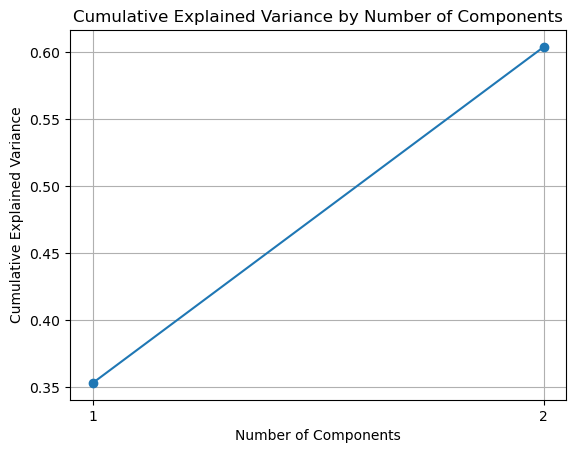

In [22]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

    16. Fitting the PCA model with the best number of components 

In [23]:
best_num_components = 2

# Fit PCA with the best number of components
pca = PCA(n_components=best_num_components)
pca.fit(scaled_features)

# Transform the data using the fitted PCA model
principal_components = pca.transform(scaled_features)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, best_num_components + 1)])

# Print the transformed data
print(principal_df)

          PC1       PC2
0    1.467952  0.803882
1    0.276716 -0.788626
2    0.014838 -1.160084
3    0.826406 -0.825015
4    0.628707 -1.112541
..        ...       ...
213 -2.725334  0.906377
214 -2.903940 -0.596255
215 -2.490536  0.992274
216 -2.785727  0.993905
217 -2.938767  0.948943

[218 rows x 2 columns]


    17. Plotting the first and second components 

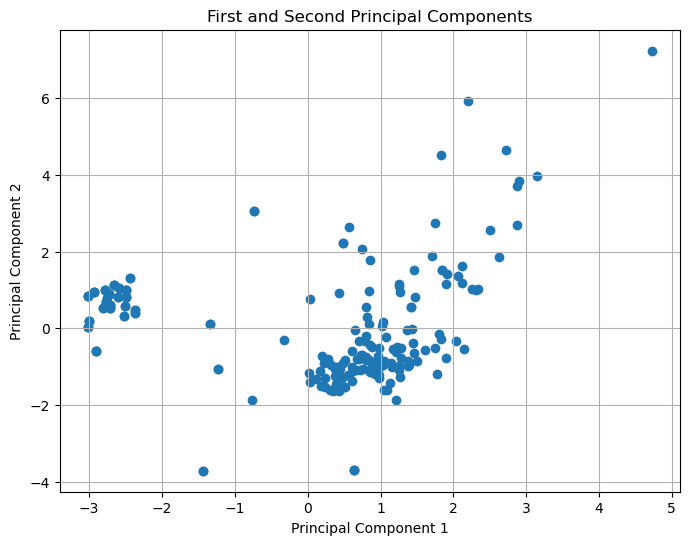

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.title('First and Second Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()